In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calplot

from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier
)

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

from itertools import product
import joblib
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV


In [3]:
from dotenv import dotenv_values
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

# Load environment variables from .env file
import pyodbc
database = "DATABASE"
server = "SERVER"
username = 'USERNAME'
password = "PASSWORD"



# Connection string
connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
connection = pyodbc.connect(connection_string)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Example SQL query
sql_query = "SELECT * FROM your_table"

# Execute the SQL query
cursor.execute(sql_query)

# Fetch the results
rows = cursor.fetchall()

# Print the results
for row in rows:
    print(row)

# Close the connection
connection.close()


OperationalError: ('08001', '[08001] [Microsoft][ODBC Driver 18 for SQL Server]Named Pipes Provider: Could not open a connection to SQL Server [53].  (53) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]A network-related or instance-specific error has occurred while establishing a connection to SERVER. Server is not found or not accessible. Check if instance name is correct and if SQL Server is configured to allow remote connections. For more information see SQL Server Books Online. (53)')

Hypothesis Tests 

Hypothesis

Formulate 1 null and alternate hypothesis each.

Null hypothesis : Products on promotions have higher or equal average sales compared those that are not on promotion
Alternative hypothesis: Products on promotions have lesser averages sales compared those that are not on promotion

product_promotion = train_filled_df[train_filled_df['Onpromotion]> 0]['sales'].mean()
product_without = train_filled_df[train_filled_df['Onpromotion]== 0]['sales'].mean()


In [2]:

holiday_df = pd.read_csv('holidays_events.csv')
train_df = pd.read_csv('train.csv')
oil_df = pd.read_csv('oil.csv')
transactions_df = pd.read_csv('transactions.csv')
store_df = pd.read_csv('stores.csv')



In [3]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


: 

In [3]:
train_date_range = pd.date_range(start=train_df['date'].min(), end=train_df['date'].max(), freq='D')


In [4]:
families = train_df['family'].unique()
stores = train_df['store_nbr'].unique()

# Create a DataFrame with all possible combinations of dates and families
all_combinations = pd.MultiIndex.from_product([train_date_range, families, stores], names=['date', 'family', 'store_nbr'])
all_df = pd.DataFrame(index=all_combinations).reset_index()


In [5]:
train_df['date'] = pd.to_datetime(train_df['date'])

In [6]:
train_df['Year'] = train_df['date'].dt.year
train_df['Month'] = train_df['date'].dt.month
train_df['Day'] = train_df['date'].dt.day
train_df['Month_name'] = train_df['date'].dt.strftime('%B')
train_df['Day_name'] = train_df['date'].dt.strftime('%A')

In [7]:

# Merge with the original DataFrame to fill missing values
train_filled_df = pd.merge(all_df, train_df, how='left', on=['date', 'family', 'store_nbr'])

# Fill remaining missing values with zeros
train_filled_df['sales'] = train_filled_df['sales'].fillna(0)
train_filled_df['onpromotion'] = train_filled_df['onpromotion'].fillna(0)

# Print the DataFrame with missing dates filled
print(train_filled_df)

              date      family  store_nbr         id   sales  onpromotion  \
0       2013-01-01  AUTOMOTIVE          1        0.0   0.000          0.0   
1       2013-01-01  AUTOMOTIVE         10       33.0   0.000          0.0   
2       2013-01-01  AUTOMOTIVE         11       66.0   0.000          0.0   
3       2013-01-01  AUTOMOTIVE         12       99.0   0.000          0.0   
4       2013-01-01  AUTOMOTIVE         13      132.0   0.000          0.0   
...            ...         ...        ...        ...     ...          ...   
3008011 2017-08-15     SEAFOOD         54  3000755.0   3.000          0.0   
3008012 2017-08-15     SEAFOOD          6  3000788.0  47.575          0.0   
3008013 2017-08-15     SEAFOOD          7  3000821.0  46.507          0.0   
3008014 2017-08-15     SEAFOOD          8  3000854.0  23.330          0.0   
3008015 2017-08-15     SEAFOOD          9  3000887.0  16.000          0.0   

           Year  Month   Day Month_name Day_name  
0        2013.0    1.0  

Univariate Analysis

In [8]:
num_column_train= train_filled_df.select_dtypes(include='number')

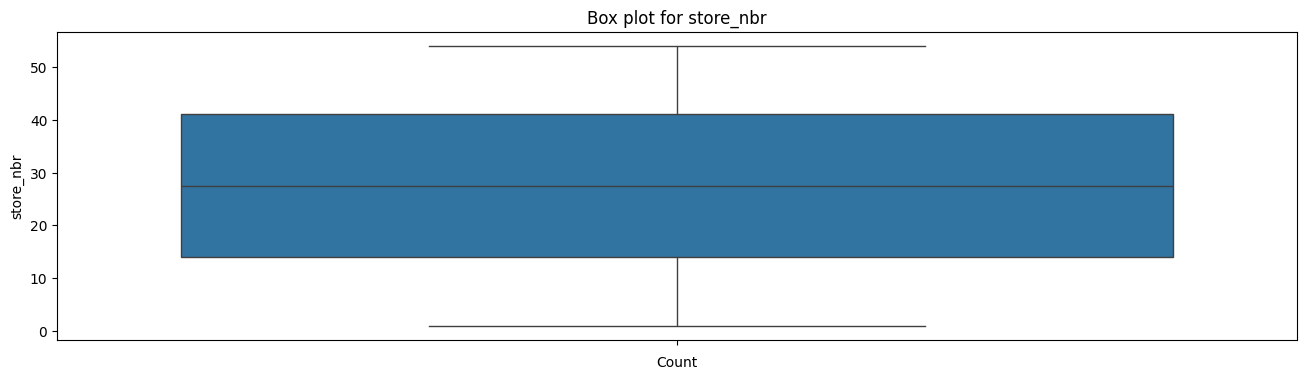

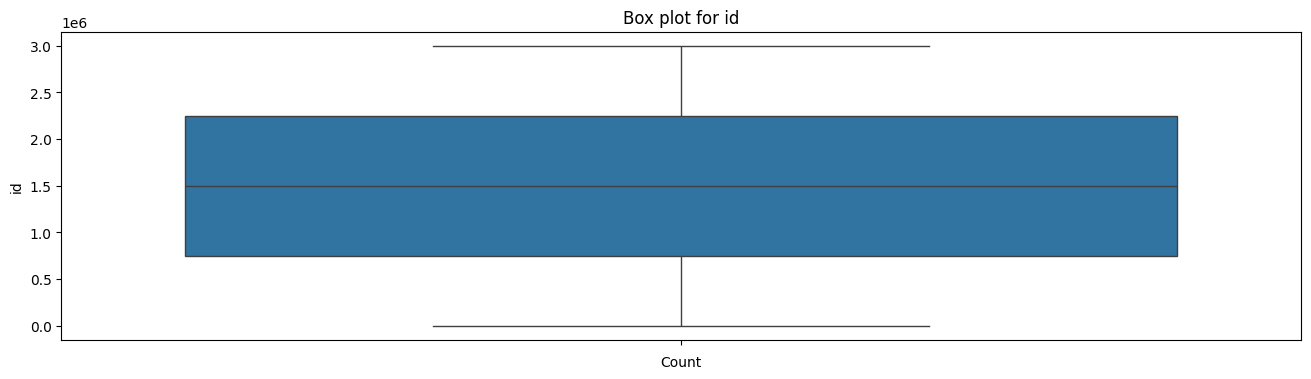

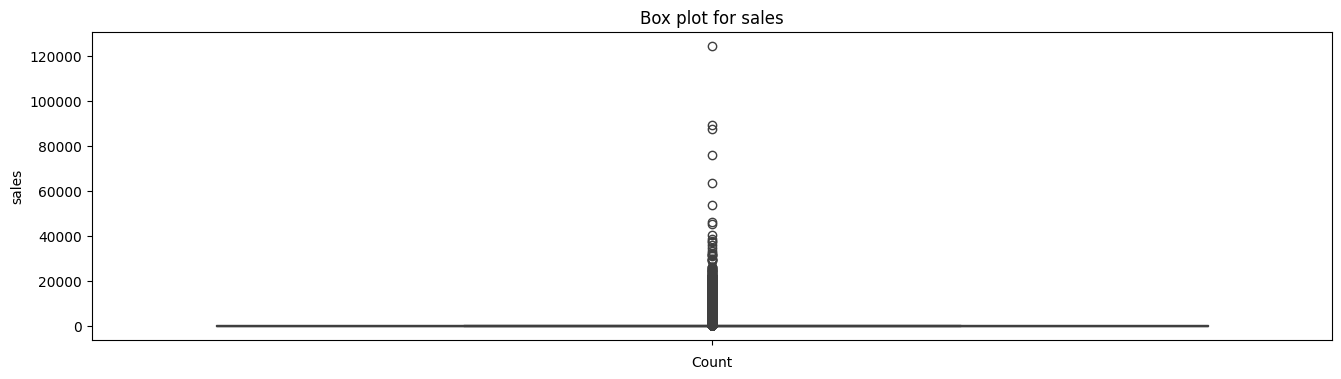

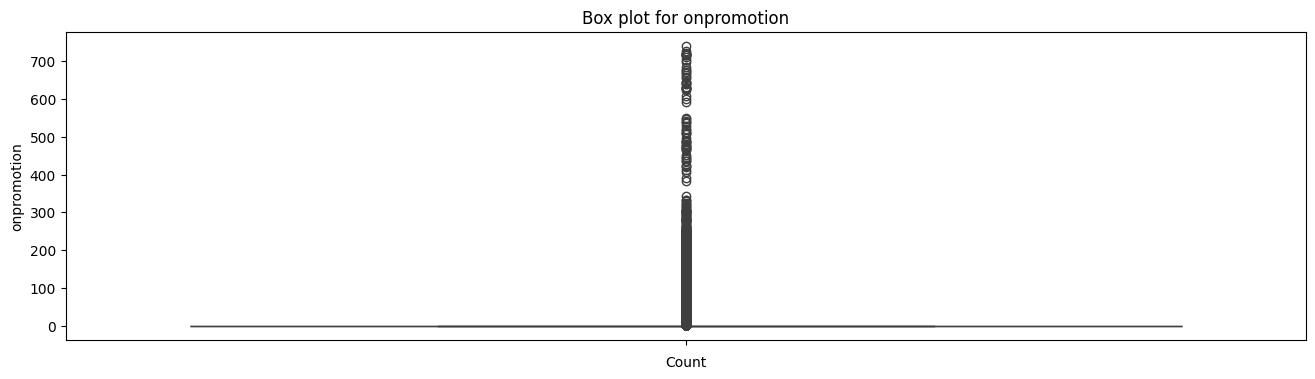

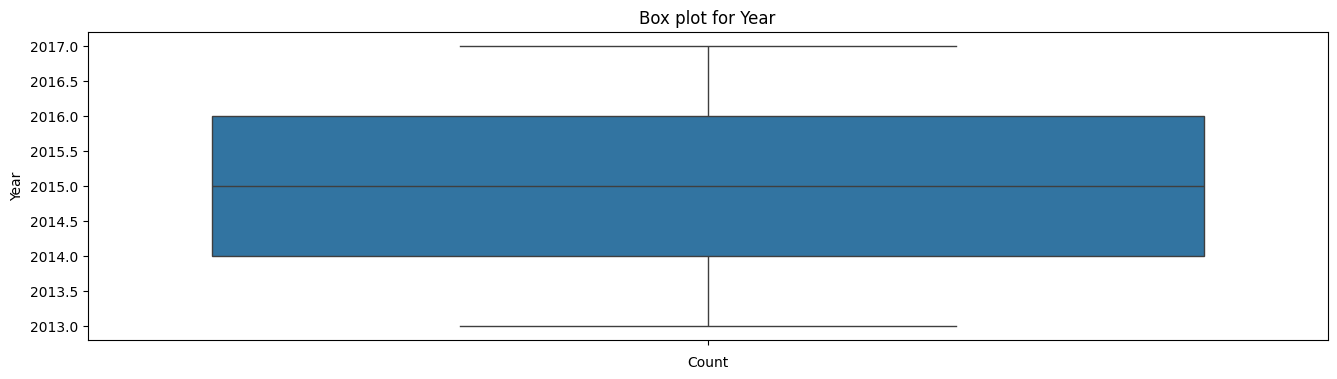

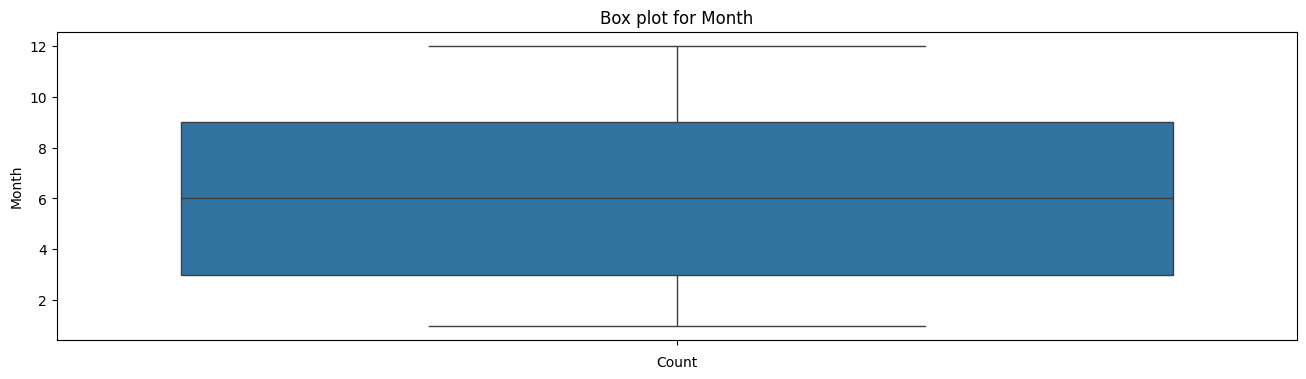

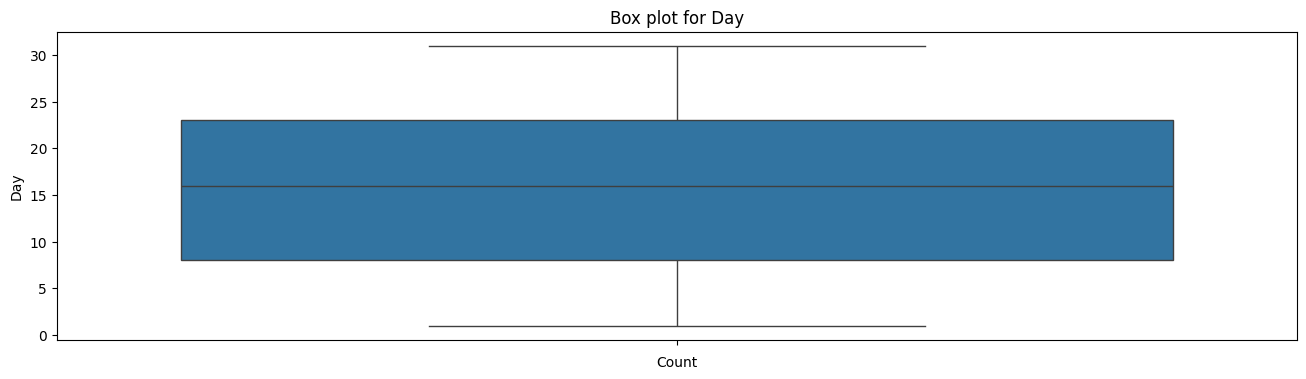

In [9]:
for column in num_column_train:
    plt.figure(figsize=(16, 4))  # Set figure size
    # Create a horizontal bar plot for the current column
    sns.boxplot(y=column, data=train_df)
    plt.title(f'Box plot for {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [10]:
train_filled_df.dtypes

date           datetime64[ns]
family                 object
store_nbr               int64
id                    float64
sales                 float64
onpromotion           float64
Year                  float64
Month                 float64
Day                   float64
Month_name             object
Day_name               object
dtype: object

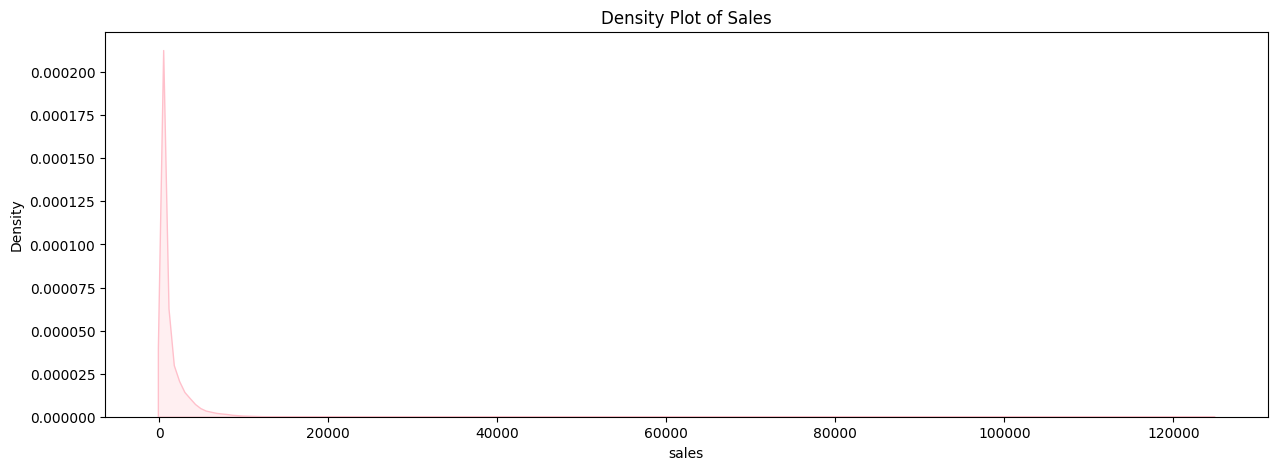

In [11]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=train_filled_df['sales'], fill=True, color='pink')
plt.title('Density Plot of Sales')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20820\2107312365.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_filled_df['onpromotion'], shade=True, color='pink')


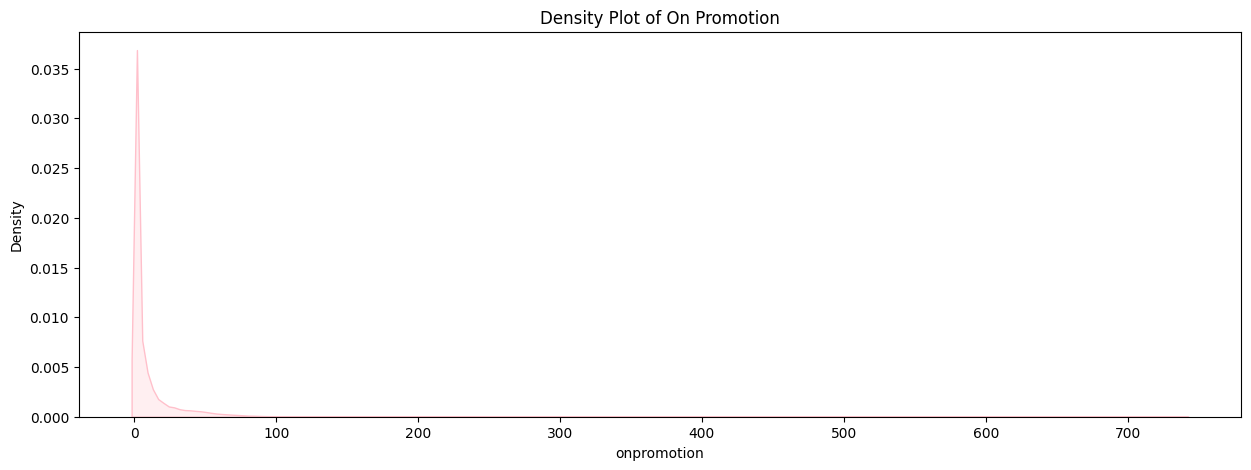

In [12]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=train_filled_df['onpromotion'], shade=True, color='pink')
plt.title('Density Plot of On Promotion')
plt.show()

In [ ]:
# Checking the skewness for few columns
train_filled_df.drop(columns=['family', 'Month_name', 'Day_name']).skew()

In [13]:
train_filled_df.groupby(train_filled_df['date'].dt.year)['sales'].sum()

date
2013    1.404190e+08
2014    2.094742e+08
2015    2.408801e+08
2016    2.886545e+08
2017    1.942171e+08
Name: sales, dtype: float64

In [41]:
# Assuming 'date' column is already in datetime format
import pandas as pd

# Group by month and year, summing the sales
monthly_sales = train_filled_df.groupby([train_filled_df['date'].dt.year, train_filled_df['date'].dt.month])['sales'].sum()
monthly_sales

date  date
2013  1       1.032762e+07
      2       9.658960e+06
      3       1.142850e+07
      4       1.099346e+07
      5       1.159770e+07
      6       1.168934e+07
      7       1.125740e+07
      8       1.173779e+07
      9       1.179293e+07
      10      1.177562e+07
      11      1.235656e+07
      12      1.580312e+07
2014  1       1.891164e+07
      2       1.203835e+07
      3       2.036558e+07
      4       1.286125e+07
      5       1.337979e+07
      6       1.331996e+07
      7       1.942189e+07
      8       1.388518e+07
      9       2.002242e+07
      10      2.039610e+07
      11      2.053164e+07
      12      2.434045e+07
2015  1       1.489692e+07
      2       1.374240e+07
      3       1.559861e+07
      4       1.495507e+07
      5       1.773037e+07
      6       2.161536e+07
      7       2.220962e+07
      8       2.296367e+07
      9       2.324088e+07
      10      2.387827e+07
      11      2.280495e+07
      12      2.724398e+07
2016  1       2.3

In [42]:

# Find the month and year with the highest sales
max_month_year = monthly_sales.idxmax()
max_sales = monthly_sales[max_month_year]

print("Month with the highest sales:", max_month_year)
print("Sales:", max_sales)


Month with the highest sales: (2016, 12)
Sales: 29640287.5793851


In [14]:
train_filled_df.set_index('date', inplace=True)

BIVARIATE ANALYSIS 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


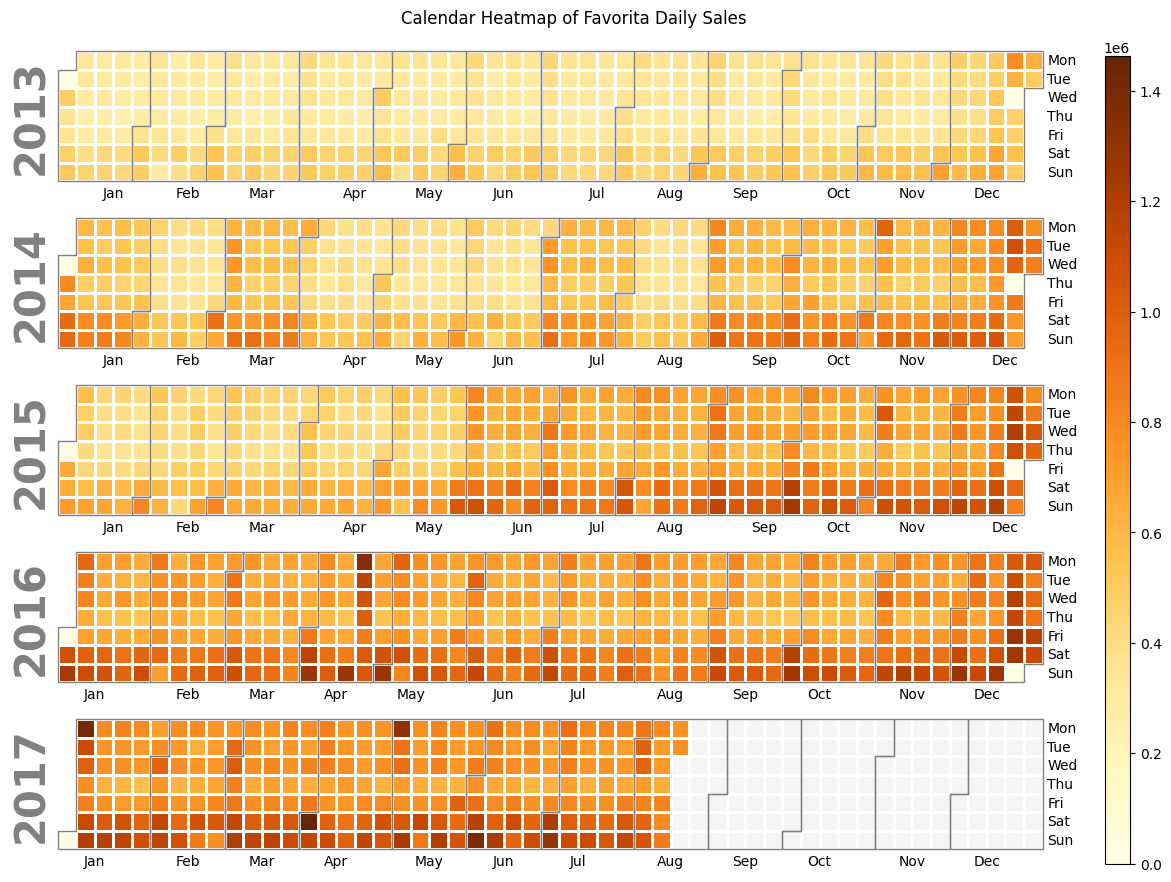

In [15]:
data = train_filled_df['sales']

# Resample the data to daily frequency if necessary
daily_data = data.resample('D').sum()

# Plot the calendar heatmap
calplot.calplot(daily_data, suptitle='Calendar Heatmap of Favorita Daily Sales', cmap='YlOrBr')
plt.show()


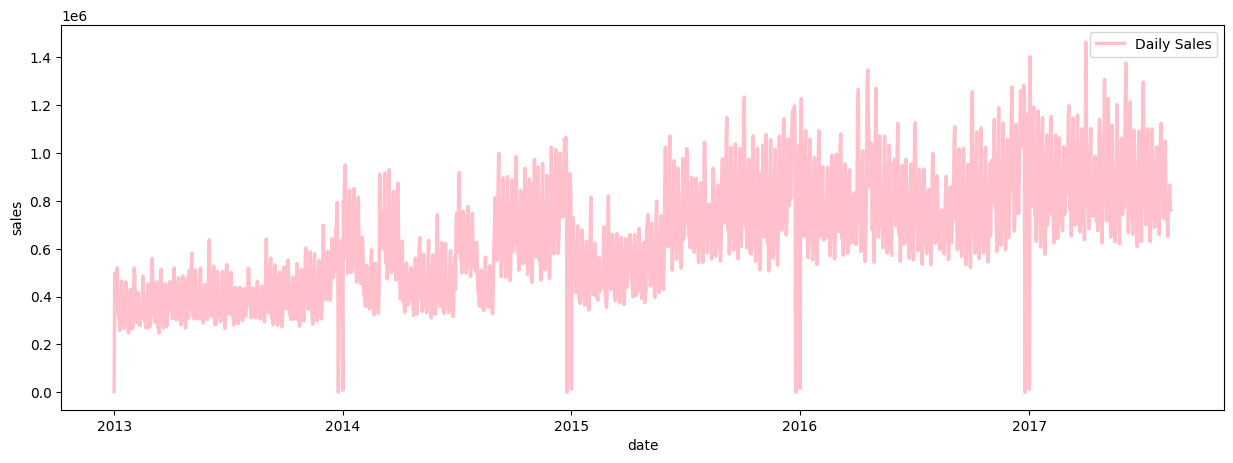

In [16]:
daily_sales=train_filled_df['sales'].sort_index(ascending=True).resample('D').sum()

plt.figure(figsize=(15,5))
sns.lineplot(data=daily_sales, color='pink', linewidth=2.5, label='Daily Sales')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20820\1854826275.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Montly_sales=train_filled_df['sales'].sort_index(ascending=True).resample('M').sum()


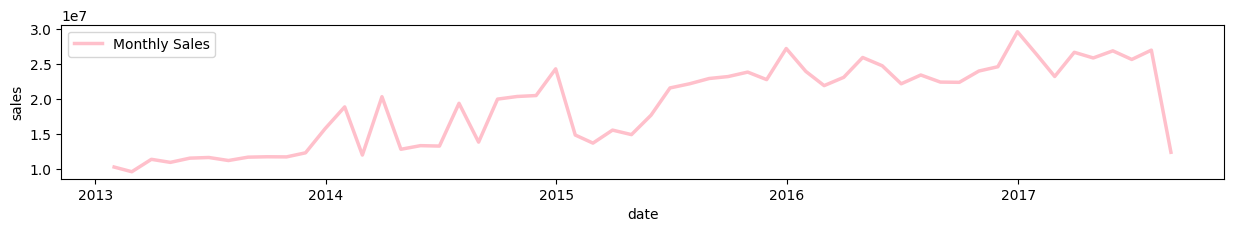

In [17]:
Montly_sales=train_filled_df['sales'].sort_index(ascending=True).resample('M').sum()

plt.figure(figsize=(15,2))
sns.lineplot(data=Montly_sales, color='pink', linewidth=2.5, label='Monthly Sales')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_31220\3994639676.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales=train_filled_df['sales'].sort_index(ascending=True).resample('Y').sum()


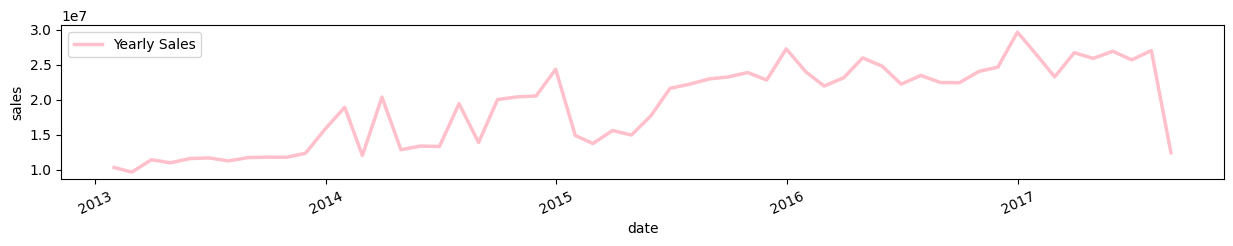

In [20]:
yearly_sales=train_filled_df['sales'].sort_index(ascending=True).resample('Y').sum()

plt.figure(figsize=(15,2))
sns.lineplot(data=yearly_sales, color='pink', linewidth=2.5, label='Yearly Sales')
plt.xticks(rotation=25)
plt.show()

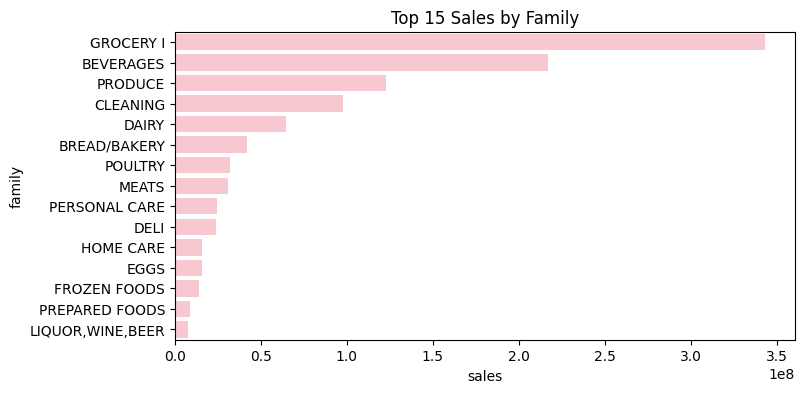

In [18]:
top_family = train_filled_df.groupby('family').sum().sort_values('sales', ascending=False).head(15).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=top_family, x='sales', y='family', color='pink', orient='h')
plt.title('Top 15 Sales by Family')
plt.show()

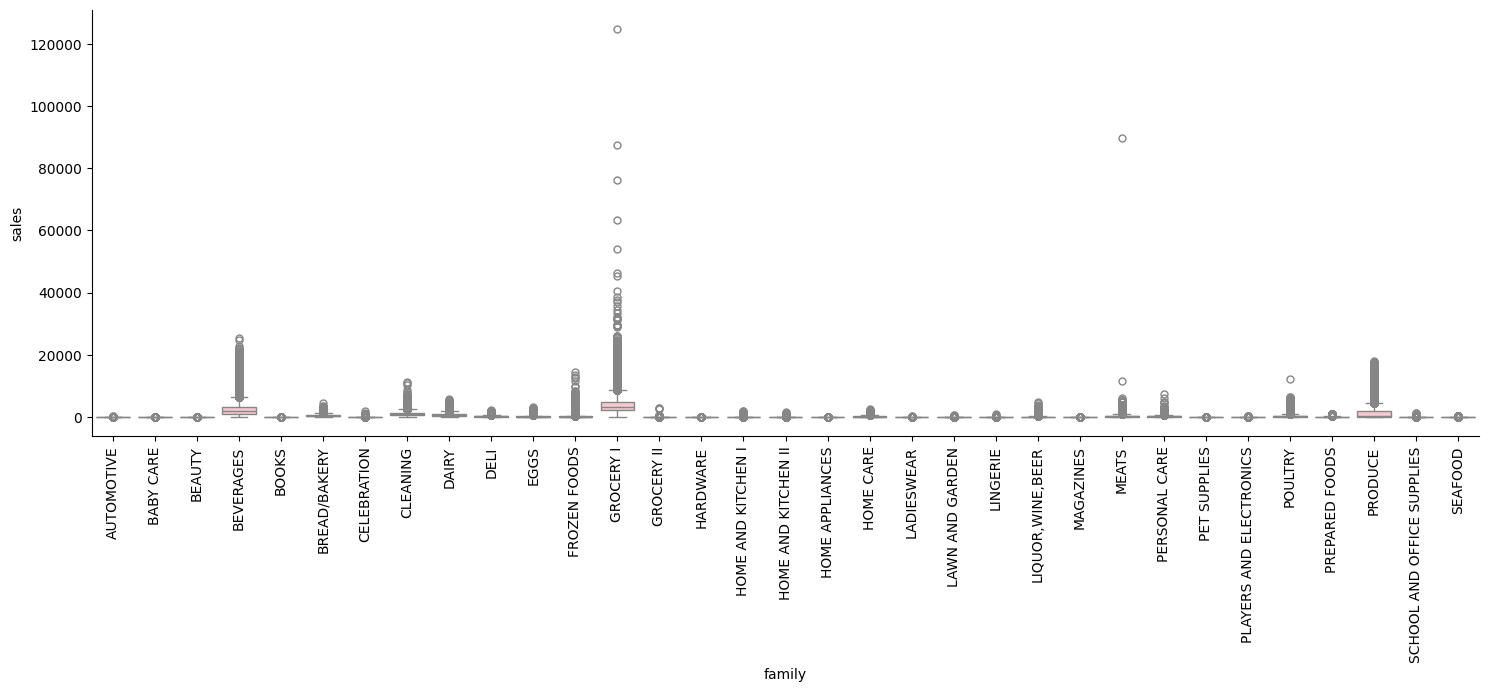

In [19]:
sns.catplot(data=train_filled_df, x='family', y='sales', kind='box', height=5, aspect=3, color='pink')
plt.xticks(rotation=90)
plt.show()

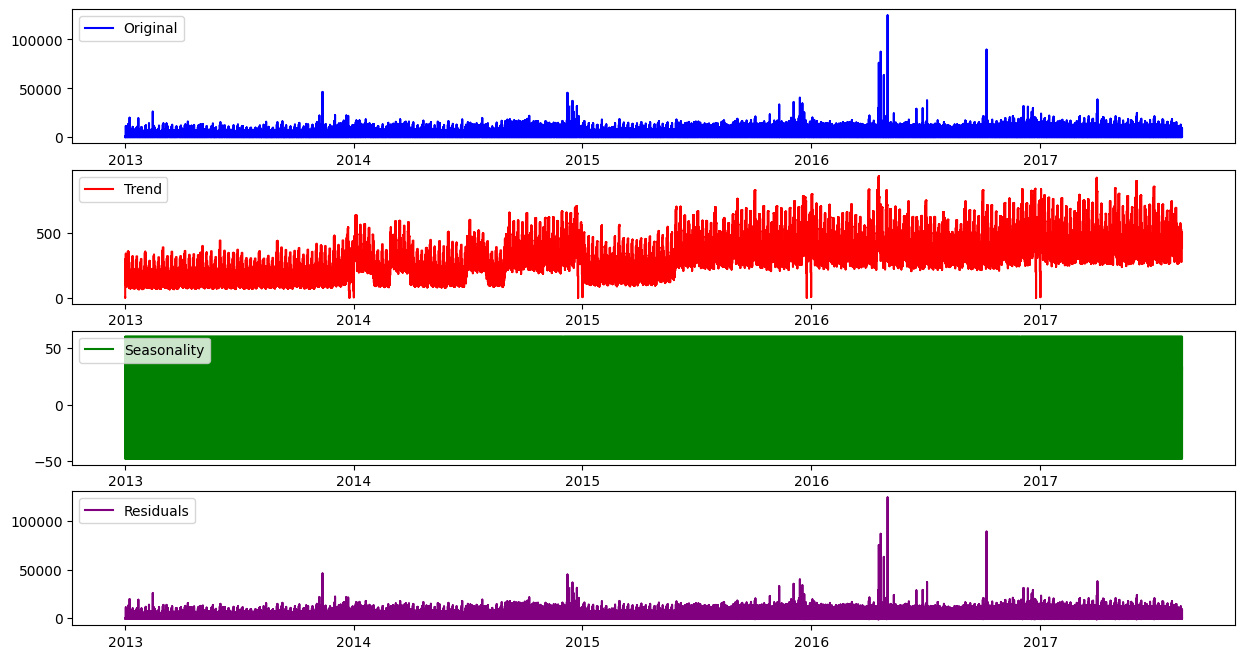

In [20]:
result = seasonal_decompose(train_filled_df['sales'], model='additive', period=1460,)
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series and its components
plt.figure(figsize=(15, 8))
plt.subplot(411)
plt.plot(train_filled_df['sales'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.show()

In [ ]:
result_promo = seasonal_decompose(train_filled_df['onpromotion'], model='additive', period=1460,)
trend = result_promo.trend
seasonal = result_promo.seasonal
residual = result_promo.resid

# Plot the original time series and its components
plt.figure(figsize=(15, 8))
plt.subplot(411)
plt.plot(train_filled_df['onpromotion'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.show()

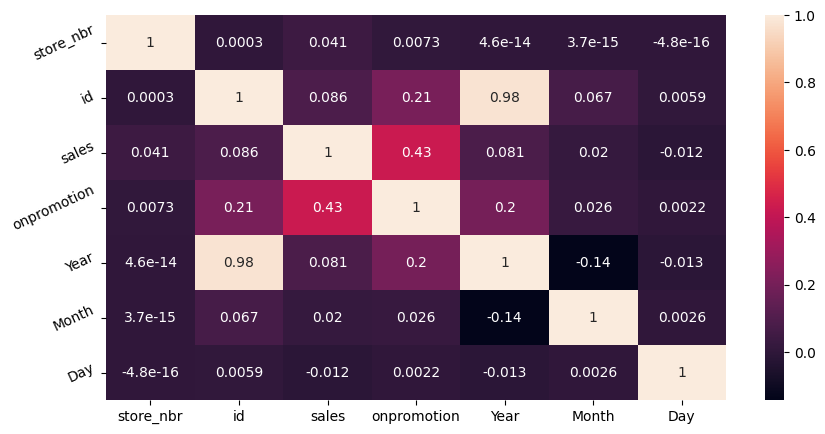

In [27]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=train_filled_df.drop(['family', 'Month_name', 'Day_name'], axis=1).corr(), annot=True, )
plt.yticks(rotation=25)
plt.show()

In [44]:
print(holiday_df.head())


         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  


QUESTION 1

In [ ]:
start_day = train_df['date'].min()
end_day = train_df['date'].max()

every_date = pd.date_range(start_day,end_day,freq = 'D')

existing_date = train_df.date

missing_date = every_date.difference(existing_date)
missing_date

QUESTION 2 

In [ ]:
open_days = train_filled_df[train_filled_df['sales']>0]

In [ ]:
daily_sales = open_days.groupby(['Year', 'Month_name', 'Day'])['sales'].sum().sort_values(ascending = False).reset_index()

In [17]:
lowest_sales_dates = daily_sales.loc[daily_sales.groupby('Year')['sales'].idxmin()]
highest_sales_dates = daily_sales.loc[daily_sales.groupby('Year')['sales'].idxmax()]


0

In [ ]:
train_filled_df['Year'] = pd.to_datetime(train_filled_df['Year']).dt.year

In [ ]:
earthquake_month_sales = train_filled_df[(train_filled_df['Month_name'] == 'April') & (train_filled_df['Year'] == 2016)]
earthquake_month_sales

In [ ]:
total_sale_earthquake = earthquake_month_sales['sales'].sum()
total_sale_earthquake

In [ ]:
total_daily_sales_april = earthquake_month_sales.groupby(['Year','Month_name','Day'])['sales'].sum().reset_index()
total_daily_sales_april.head()

In [ ]:
plt.figure(figsize= (15,5))
sns.lineplot(data = total_daily_sales_april, y = 'sales', x = 'Day' )
plt.title('Favorita\'s Sales trend before and after the Earthquake (16 April, 2016)')
plt.show()

In [ ]:
average_before_earthquake = total_daily_sales_april[total_daily_sales_april['Day'] > 16]['sales'].mean()
average_after_earthquake = total_daily_sales_april[total_daily_sales_april['Day'] < 16]['sales'].mean()

In [ ]:



holiday_df.duplicated().sum()


In [18]:
sod = holiday_df.date.min()
eod = holiday_df.date.max()
holiday_range = pd.date_range(sod, eod, freq='D')
holiday_range

DatetimeIndex(['2012-03-02', '2012-03-03', '2012-03-04', '2012-03-05',
               '2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10', '2012-03-11',
               ...
               '2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26'],
              dtype='datetime64[ns]', length=2126, freq='D')

In [19]:
holiday_df['date'] = pd.to_datetime(holiday_df['date'])

In [20]:
holiday_df_filled = pd.merge(pd.DataFrame({'date': holiday_range}), holiday_df, on='date', how='left')

In [21]:
holiday_df_filled


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-03-03,NaN,NaN,NaN,NaN,NaN
2,2012-03-04,NaN,NaN,NaN,NaN,NaN
3,2012-03-05,NaN,NaN,NaN,NaN,NaN
4,2012-03-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2159,2017-12-22,Additional,National,Ecuador,Navidad-3,False
2160,2017-12-23,Additional,National,Ecuador,Navidad-2,False
2161,2017-12-24,Additional,National,Ecuador,Navidad-1,False
2162,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [22]:
holiday_df_filled.isna().sum()

date              0
type           1814
locale         1814
locale_name    1814
description    1814
transferred    1814
dtype: int64

In [23]:
holiday_df_filled.describe(include='all')

,date,type,locale,locale_name,description,transferred
count,2164,350,350,350,350,350
unique,NaN,6,3,24,103,2
top,NaN,Holiday,National,Ecuador,Carnaval,False
freq,NaN,221,174,174,10,338
mean,2015-01-30 00:01:19.852125952,NaN,NaN,NaN,NaN,NaN
min,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
25%,2013-08-14 18:00:00,NaN,NaN,NaN,NaN,NaN
50%,2015-01-30 12:00:00,NaN,NaN,NaN,NaN,NaN
75%,2016-07-12 06:00:00,NaN,NaN,NaN,NaN,NaN
max,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


In [24]:
holiday_df.select_dtypes(include='object')

,type,locale,locale_name,description
0,Holiday,Local,Manta,Fundacion de Manta
1,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,Holiday,Local,Cuenca,Fundacion de Cuenca
3,Holiday,Local,Libertad,Cantonizacion de Libertad
4,Holiday,Local,Riobamba,Cantonizacion de Riobamba
...,...,...,...,...
345,Additional,National,Ecuador,Navidad-3
346,Additional,National,Ecuador,Navidad-2
347,Additional,National,Ecuador,Navidad-1
348,Holiday,National,Ecuador,Navidad


In [25]:
num_column_hols= holiday_df.select_dtypes(include='number')

In [26]:
cat_column_hols = holiday_df.select_dtypes(include='object')

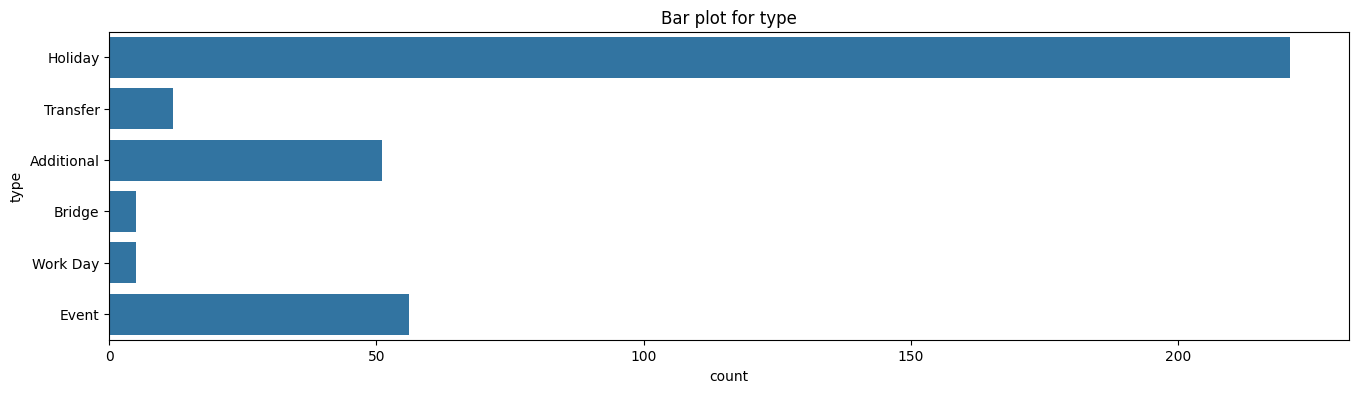

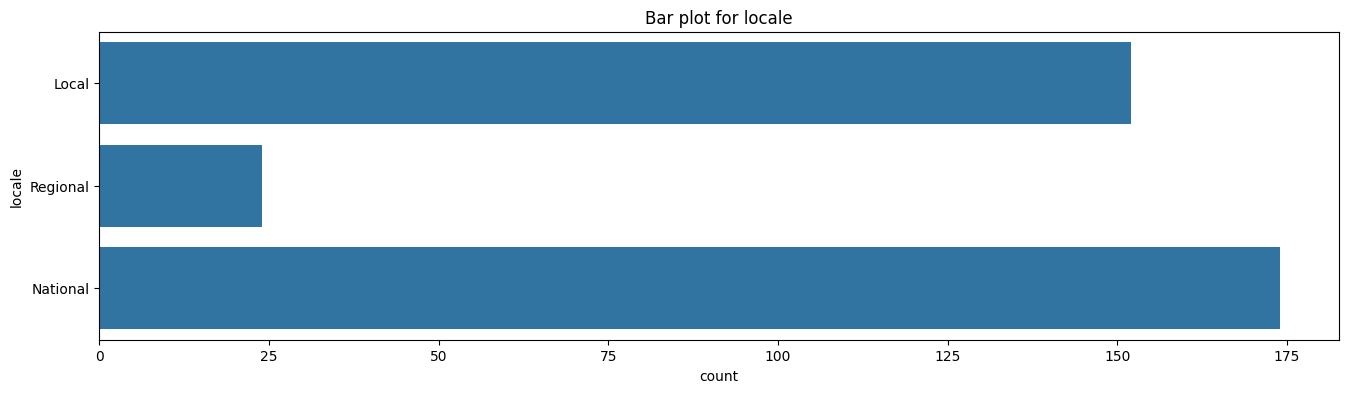

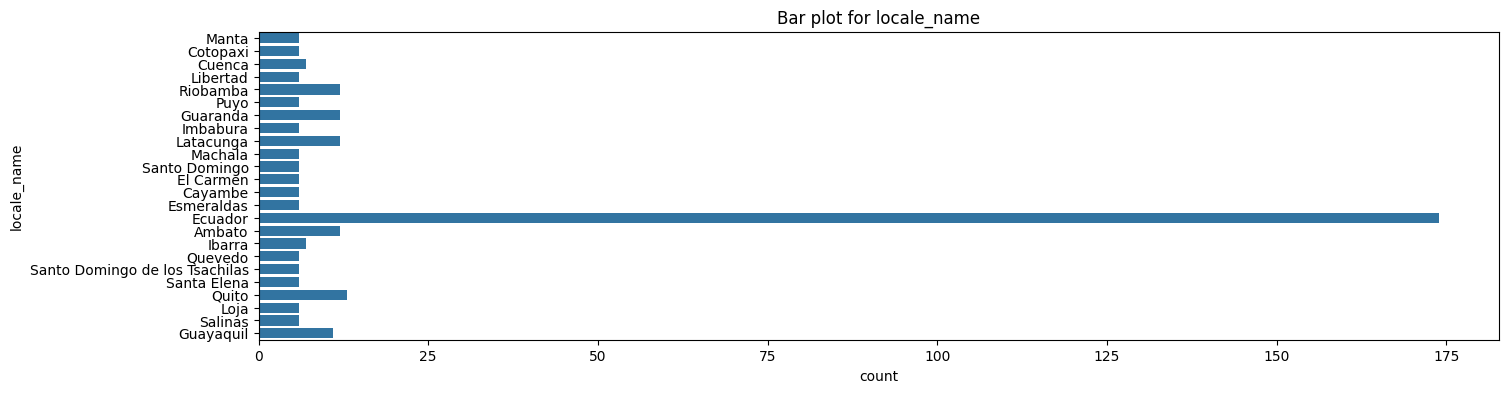

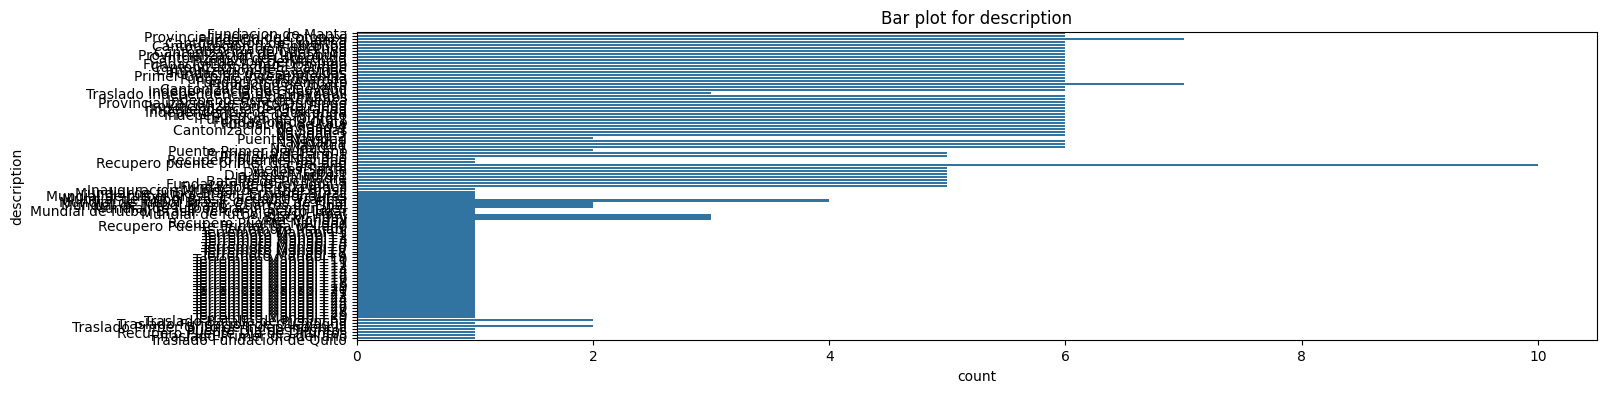

In [ ]:
for i in cat_column_hols:
    
    plt.figure(figsize=(16, 4))
    sns.countplot(y=i,data=holiday_df_filled)
    plt.title(f'Bar plot for {i}')
    plt.xlabel('count')
    plt.show()

In [ ]:
for i in num_column_hols:
    plt.figure(figsize=(16,4))
    sns.boxplotplot(y=i,data=holiday_df_filled)
    plt.title(f'box plot for {i}')
    plt.xlabel('count')
    plt.show()

### Oil df 

In [36]:

print(oil_df.head())


         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02   93.139999
2  2013-01-03   92.970001
3  2013-01-04   93.120003
4  2013-01-07   93.199997


In [37]:
print(oil_df.dtypes)



date           object
dcoilwtico    float64
dtype: object


In [38]:
oil_df['date'] = pd.to_datetime(oil_df['date'])


In [ ]:
oil_df['Oil_price'] = oil_df['Oil_price'].ffill()

In [ ]:
oil_df['Oil_price'] = oil_df['Oil_price'].bfill()

In [ ]:
train_oil_df = pd.merge(train_filled_df, oil_df, on = ['date','Year','Month','Day','Month_name','Day_name'], how = 'left')
train_oil_df.head()

In [39]:
sod_oil= oil_df.date.min()
eod_oil = oil_df.date.max()

In [40]:


oil_range = pd.date_range(sod_oil, eod_oil, freq='D')

oil_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1704, freq='D')

In [41]:
difference=oil_range.difference(oil_df.date)
print(difference)

DatetimeIndex(['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13',
               '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27',
               '2013-02-02', '2013-02-03',
               ...
               '2017-07-29', '2017-07-30', '2017-08-05', '2017-08-06',
               '2017-08-12', '2017-08-13', '2017-08-19', '2017-08-20',
               '2017-08-26', '2017-08-27'],
              dtype='datetime64[ns]', length=486, freq=None)


In [42]:
oil_df_filled = pd.merge(pd.DataFrame({'date': oil_range}), oil_df, on='date', how='left')

In [43]:
oil_df_filled

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-05,NaN
...,...,...
1699,2017-08-27,NaN
1700,2017-08-28,46.400002
1701,2017-08-29,46.459999
1702,2017-08-30,45.959999


### STORE_DF

In [ ]:

store_df.head()

,Unnamed: 0,store_nbr,city,state,type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
store_df = store_df.drop(columns='Unnamed: 0')

In [ ]:
store_df.shape

(54, 5)

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
cat_column = store_df.select_dtypes(include='object')

In [ ]:
num_column = store_df.select_dtypes(include='number')

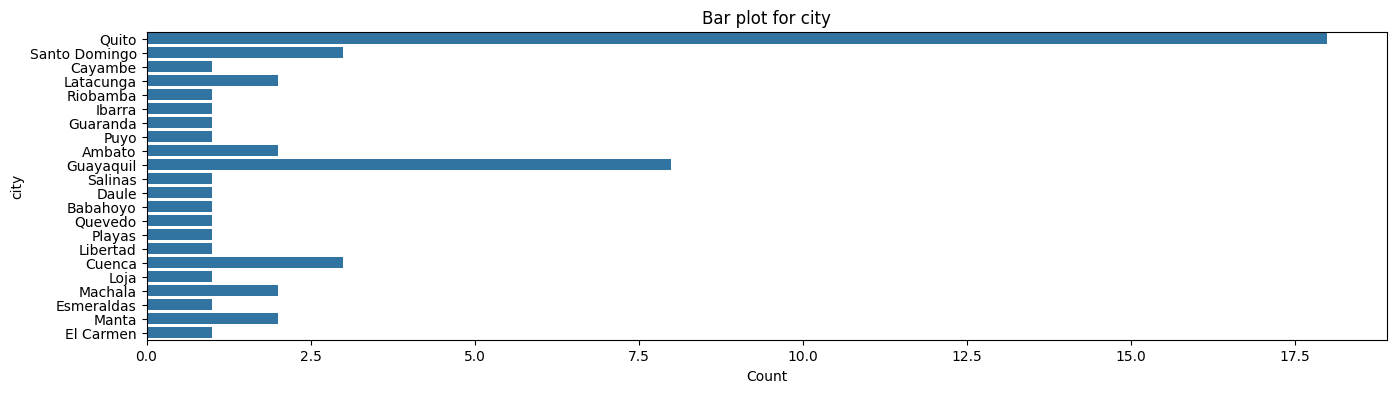

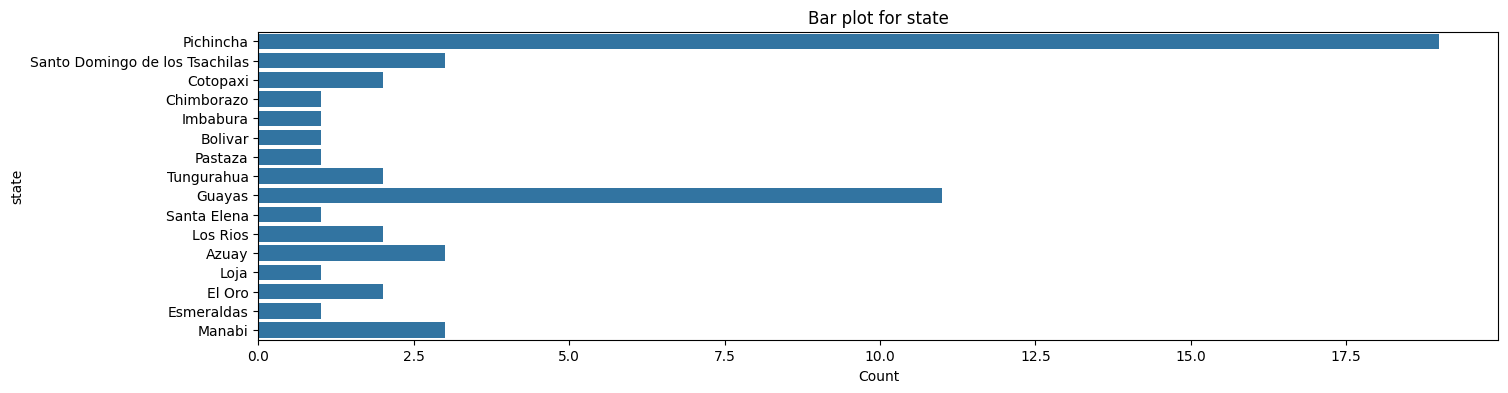

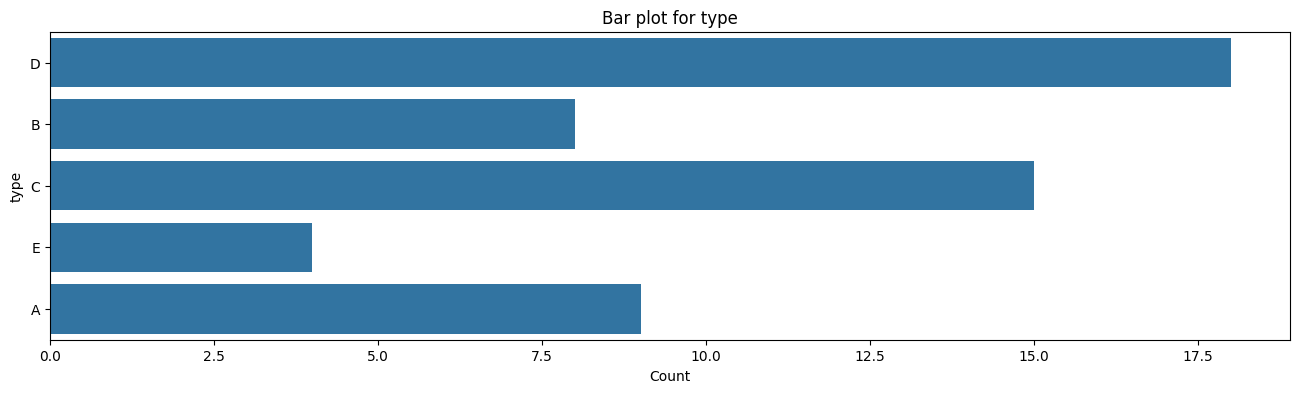

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Loop through each categorical column
for column in cat_column:
    plt.figure(figsize=(16, 4))  # Set figure size
    # Create a horizontal bar plot for the current column
    sns.countplot(y=column, data=store_df)
    plt.title(f'Bar plot for {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()




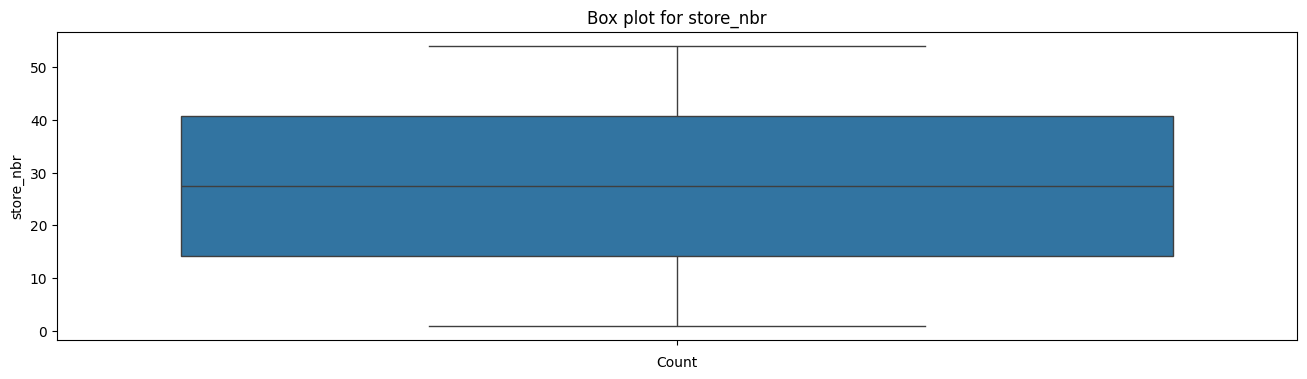

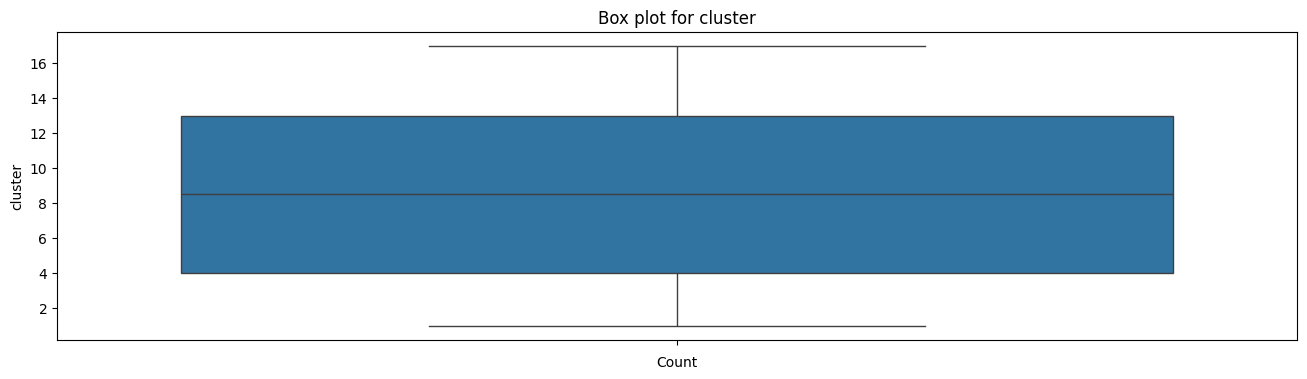

In [ ]:
for column in num_column:
    plt.figure(figsize=(16, 4))  # Set figure size
    # Create a horizontal bar plot for the current column
    sns.boxplot(y=column, data=store_df)
    plt.title(f'Box plot for {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

<Figure size 1600x400 with 0 Axes>

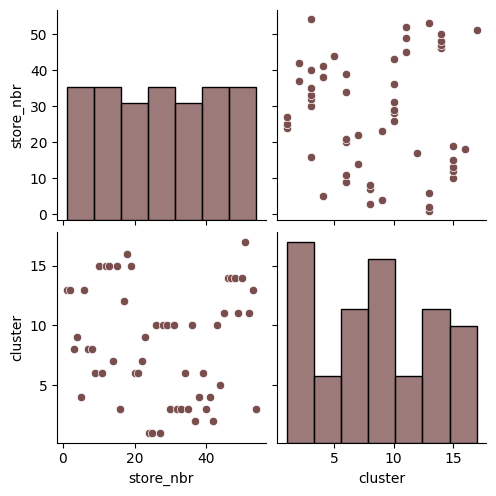

In [ ]:
plt.figure(figsize=(16, 4))
sns.set_palette('pink')
sns.pairplot(store_df)
plt.show()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt



# Loop through each numeric column
for column in num_column:
    plt.figure(figsize=(16, 4))  # Set figure size
    # Create a KDE plot for the current column
    sns.kdeplot(x=store_df[column], color='pink', fill=True, alpha=0.3)
    plt.title(f'KDE plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()



NameError: name 'num_column' is not defined

In [ ]:
for column in num_column:
    skewness = store_df[column].skew()
    print(f"Skewness of {column}: {skewness}")

Skewness of store_nbr: 0.0
Skewness of cluster: 0.0412413665900577


In [81]:
store_df.head()

,Unnamed: 0,store_nbr,city,state,type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [82]:
store_df.drop(columns='Unnamed: 0')

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [27]:
train_store_merge = train_filled_df.merge(store_df,on='store_nbr')

In [28]:
train_store_merge

,date,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name,Unnamed: 0,city,state,type,cluster
0,2013-01-01,AUTOMOTIVE,1,0.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,0,Quito,Pichincha,D,13
1,2013-01-01,AUTOMOTIVE,10,33.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,9,Quito,Pichincha,C,15
2,2013-01-01,AUTOMOTIVE,11,66.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,10,Cayambe,Pichincha,B,6
3,2013-01-01,AUTOMOTIVE,12,99.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,11,Latacunga,Cotopaxi,C,15
4,2013-01-01,AUTOMOTIVE,13,132.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,12,Latacunga,Cotopaxi,C,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,2017-08-15,SEAFOOD,54,3000755.0,3.000,0.0,2017.0,8.0,15.0,August,Tuesday,53,El Carmen,Manabi,C,3
3008012,2017-08-15,SEAFOOD,6,3000788.0,47.575,0.0,2017.0,8.0,15.0,August,Tuesday,5,Quito,Pichincha,D,13
3008013,2017-08-15,SEAFOOD,7,3000821.0,46.507,0.0,2017.0,8.0,15.0,August,Tuesday,6,Quito,Pichincha,D,8
3008014,2017-08-15,SEAFOOD,8,3000854.0,23.330,0.0,2017.0,8.0,15.0,August,Tuesday,7,Quito,Pichincha,D,8


In [ ]:
train_store_merge.drop(columns= 'Unnamed: 0')

In [ ]:
sales_by_scct = train_store_merge[['cluster','city','state','type','store_nbr']]

for column in sales_by_scct.columns:
    Top_sales = train_store_merge.groupby(column)['sales'].sum().sort_values(ascending= False).head(10).reset_index()
    print(f'Top_sales by {column}\n {Top_sales}')

In [ ]:
for column in sales_by_scct.columns:
    Top_sales = train_store_merge.groupby(column)['sales'].sum().sort_values(ascending= False).head(10).reset_index()
    plt.figure(figsize = (15,5))
    sns.barplot(data = Top_sales, x = 'sales', y = column, orient = 'h', color='pink')
    plt.title(f' Top 10 sales by {column}')
    plt.show()

In [31]:
numeric_columns =train_store_merge.select_dtypes(include='number')

# Group by 'family' column and sum the numeric columns
result = train_store_merge.groupby('state')['sales'].sum()



In [32]:
result

state
Azuay                             4.916860e+07
Bolivar                           1.304951e+07
Chimborazo                        1.138792e+07
Cotopaxi                          2.118226e+07
El Oro                            3.338680e+07
Esmeraldas                        1.639169e+07
Guayas                            1.651544e+08
Imbabura                          1.145127e+07
Loja                              1.886000e+07
Los Rios                          3.192537e+07
Manabi                            2.496982e+07
Pastaza                           4.090202e+06
Pichincha                         5.850674e+08
Santa Elena                       1.142100e+07
Santo Domingo de los Tsachilas    3.583432e+07
Tungurahua                        4.030440e+07
Name: sales, dtype: float64

In [18]:
result_sorted = result.sort_values(by='sales', ascending=False)

AttributeError: 'DecomposeResult' object has no attribute 'sort_values'

TRANSACTION_DF


In [56]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [58]:
sod_t = transactions_df['date'].min()
eod_t = transactions_df['date'].max()

In [59]:
pd.date_range(sod_t, eod_t, freq='D')

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [65]:
num_column_t= transactions_df.select_dtypes(include='number')

In [61]:
cat_column_t = transactions_df.select_dtypes(include='object')

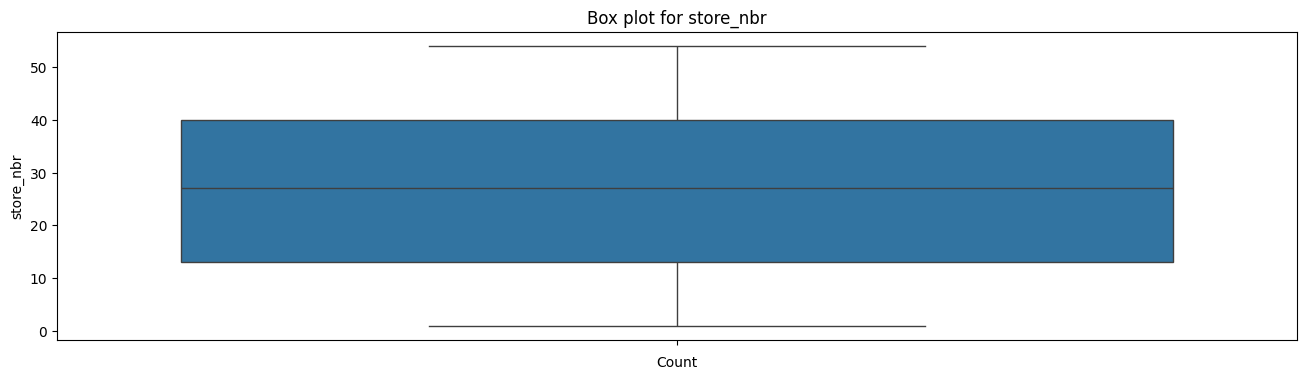

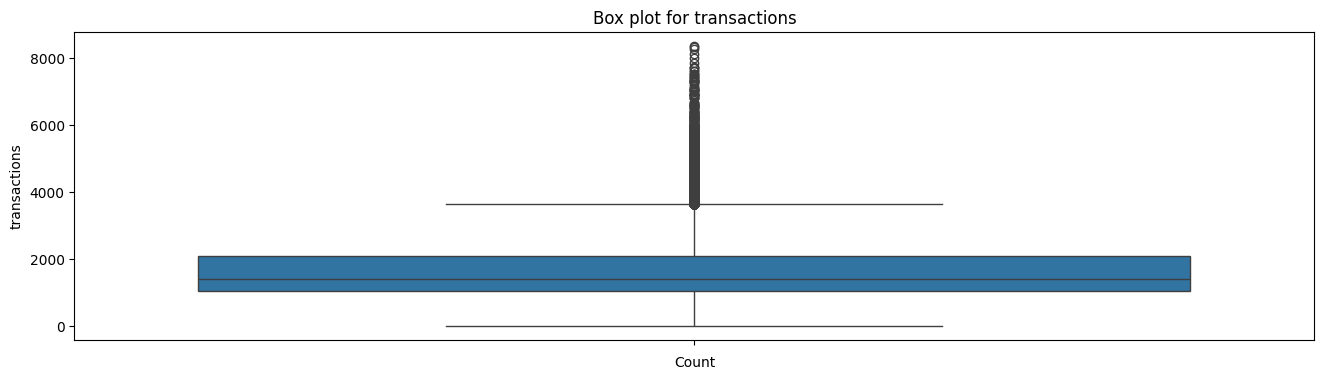

In [69]:
for column in num_column_t:
    plt.figure(figsize=(16, 4))  # Set figure size
    # Create a horizontal bar plot for the current column
    sns.boxplot(y=column, data=transactions_df)
    plt.title(f'Box plot for {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [ ]:
sns.kdeplot(data=transactions_df,x='')

In [62]:
transactions_df.value_counts

<bound method DataFrame.value_counts of              date  store_nbr  transactions
0      2013-01-01         25           770
1      2013-01-02          1          2111
2      2013-01-02          2          2358
3      2013-01-02          3          3487
4      2013-01-02          4          1922
...           ...        ...           ...
83483  2017-08-15         50          2804
83484  2017-08-15         51          1573
83485  2017-08-15         52          2255
83486  2017-08-15         53           932
83487  2017-08-15         54           802

[83488 rows x 3 columns]>

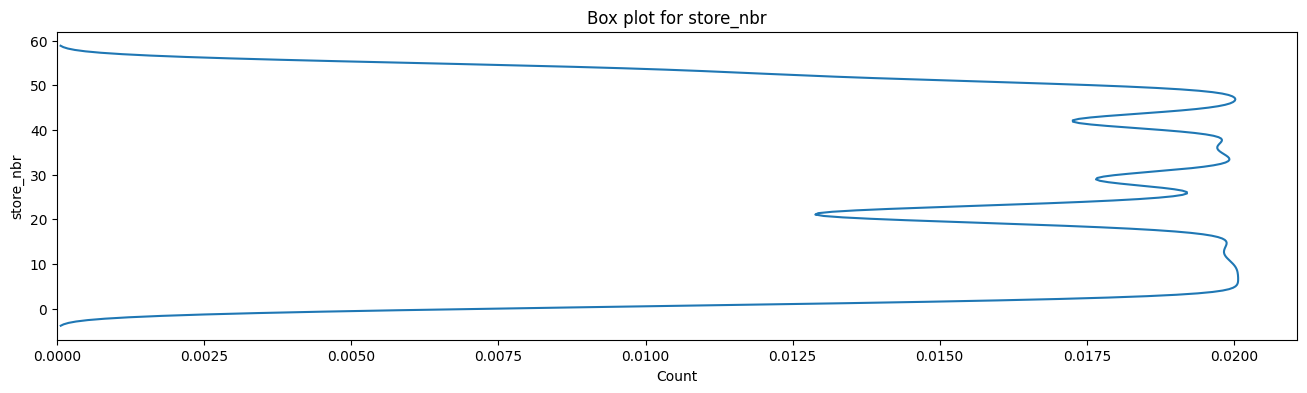

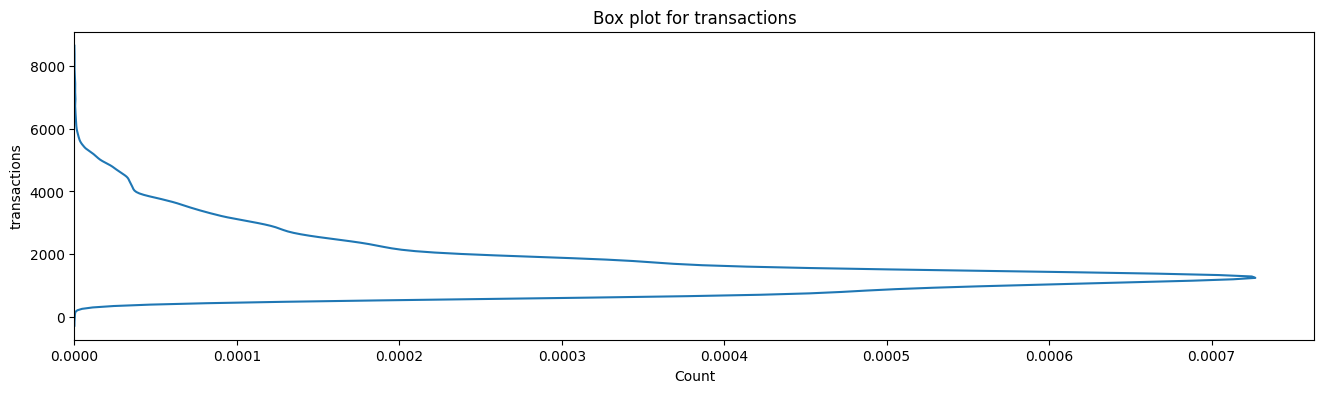

In [72]:
for column in num_column_t:
    plt.figure(figsize=(16, 4))  # Set figure size
    # Create a horizontal bar plot for the current column
    sns.kdeplot(y=column, data=transactions_df)
    plt.title(f'Box plot for {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

##  COMBINING OIL AND TRAIN DF


In [44]:
train_dates = set(train_filled_df['date'])
oil_dates = set(oil_df_filled['date'])

# Find the difference between the sets
difference_oil =  oil_dates - train_dates


In [45]:
difference_oil

{Timestamp('2017-08-16 00:00:00'),
 Timestamp('2017-08-17 00:00:00'),
 Timestamp('2017-08-18 00:00:00'),
 Timestamp('2017-08-19 00:00:00'),
 Timestamp('2017-08-20 00:00:00'),
 Timestamp('2017-08-21 00:00:00'),
 Timestamp('2017-08-22 00:00:00'),
 Timestamp('2017-08-23 00:00:00'),
 Timestamp('2017-08-24 00:00:00'),
 Timestamp('2017-08-25 00:00:00'),
 Timestamp('2017-08-26 00:00:00'),
 Timestamp('2017-08-27 00:00:00'),
 Timestamp('2017-08-28 00:00:00'),
 Timestamp('2017-08-29 00:00:00'),
 Timestamp('2017-08-30 00:00:00'),
 Timestamp('2017-08-31 00:00:00')}

In [46]:
# Merge the two DataFrames on the 'date' column
train_oil_concat = pd.concat([train_filled_df, oil_df_filled], ignore_index=False)

# Find the difference in dates between the two DataFrames
difference_dates = set(oil_df_filled['date']) - set(train_filled_df['date'])

# Drop rows from train_oil_concat where the date is in the difference_dates set
train_oil_concat = train_oil_concat[~train_oil_concat['date'].isin(difference_dates)]


In [47]:
train_oil_concat

,date,family,store_nbr,id,sales,onpromotion,dcoilwtico
0,2013-01-01,AUTOMOTIVE,1.0,0.0,0.0,0.0,NaN
1,2013-01-01,AUTOMOTIVE,10.0,33.0,0.0,0.0,NaN
2,2013-01-01,AUTOMOTIVE,11.0,66.0,0.0,0.0,NaN
3,2013-01-01,AUTOMOTIVE,12.0,99.0,0.0,0.0,NaN
4,2013-01-01,AUTOMOTIVE,13.0,132.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
1683,2017-08-11,NaN,NaN,NaN,NaN,NaN,48.810001
1684,2017-08-12,NaN,NaN,NaN,NaN,NaN,NaN
1685,2017-08-13,NaN,NaN,NaN,NaN,NaN,NaN
1686,2017-08-14,NaN,NaN,NaN,NaN,NaN,47.590000


In [48]:
train_oil_concat.isna().sum()

date                 0
family            1688
store_nbr         1688
id                8816
sales             1688
onpromotion       1688
dcoilwtico     3008541
dtype: int64

In [72]:
train_oil_concat.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,3009704,NaN,NaN,NaN,2015-04-24 12:00:00.000000512,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,NaN
family,3008016,33,AUTOMOTIVE,91152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,3008016.0,NaN,NaN,NaN,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
id,3000888.0,NaN,NaN,NaN,1500443.5,0.0,750221.75,1500443.5,2250665.25,3000887.0,866281.891642
sales,3008016.0,NaN,NaN,NaN,356.927939,0.0,0.0,11.0,195.0,124717.0,1100.828716
onpromotion,3008016.0,NaN,NaN,NaN,2.596603,0.0,0.0,0.0,0.0,741.0,12.205053
dcoilwtico,1163.0,NaN,NaN,NaN,67.925589,26.190001,46.390001,53.330002,95.790001,110.620003,25.677366


Combining Holiday_df and Train_df

In [49]:
train_dates = set(train_filled_df['date'])
holiday_dates = set(holiday_df_filled['date'])

# Find the difference between the sets
difference_Holiday_train =  holiday_dates - train_dates


In [50]:
difference_Holiday_train

{Timestamp('2012-03-02 00:00:00'),
 Timestamp('2012-03-03 00:00:00'),
 Timestamp('2012-03-04 00:00:00'),
 Timestamp('2012-03-05 00:00:00'),
 Timestamp('2012-03-06 00:00:00'),
 Timestamp('2012-03-07 00:00:00'),
 Timestamp('2012-03-08 00:00:00'),
 Timestamp('2012-03-09 00:00:00'),
 Timestamp('2012-03-10 00:00:00'),
 Timestamp('2012-03-11 00:00:00'),
 Timestamp('2012-03-12 00:00:00'),
 Timestamp('2012-03-13 00:00:00'),
 Timestamp('2012-03-14 00:00:00'),
 Timestamp('2012-03-15 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-03-17 00:00:00'),
 Timestamp('2012-03-18 00:00:00'),
 Timestamp('2012-03-19 00:00:00'),
 Timestamp('2012-03-20 00:00:00'),
 Timestamp('2012-03-21 00:00:00'),
 Timestamp('2012-03-22 00:00:00'),
 Timestamp('2012-03-23 00:00:00'),
 Timestamp('2012-03-24 00:00:00'),
 Timestamp('2012-03-25 00:00:00'),
 Timestamp('2012-03-26 00:00:00'),
 Timestamp('2012-03-27 00:00:00'),
 Timestamp('2012-03-28 00:00:00'),
 Timestamp('2012-03-29 00:00:00'),
 Timestamp('2012-03-

In [52]:
train_holiday_concat = pd.concat([train_filled_df, holiday_df_filled], ignore_index=False)

# Find the difference in dates between the two DataFrames
difference_dates = set(holiday_df_filled['date']) - set(train_filled_df['date'])

# Drop rows from train_oil_concat where the date is in the difference_dates set
train_holiday_concat = train_holiday_concat[~train_holiday_concat['date'].isin(difference_dates)]

In [75]:
train_holiday_concat.isna().sum()

date                 0
family            1718
store_nbr         1718
id                8846
sales             1718
onpromotion       1718
type           3009448
locale         3009448
locale_name    3009448
description    3009448
transferred    3009448
dtype: int64

In [55]:
train_holiday_concat.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,3009734,NaN,NaN,NaN,2015-04-24 12:01:45.957005312,2013-01-01 00:00:00,2014-02-27 00:00:00,2015-04-25 00:00:00,2016-06-20 00:00:00,2017-08-15 00:00:00,NaN
family,3008016,33,AUTOMOTIVE,91152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,3008016.0,NaN,NaN,NaN,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
id,3000888.0,NaN,NaN,NaN,1500443.5,0.0,750221.75,1500443.5,2250665.25,3000887.0,866281.891642
sales,3008016.0,NaN,NaN,NaN,356.927939,0.0,0.0,11.0,195.0,124717.0,1100.828716
onpromotion,3008016.0,NaN,NaN,NaN,2.596603,0.0,0.0,0.0,0.0,741.0,12.205053
type,286,6,Holiday,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locale,286,3,National,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locale_name,286,24,Ecuador,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,286,102,Carnaval,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preparation 

Making the Data Stationary
**Making the Data Stationary**

- De-trending: Differencing and Seasonal Differencing: y(t) = y(t) - y(t-1)
- Rolling Statistics - Moving averages
- Transformation log, sqrt, cbrt + Differencing 


In [22]:
train_filled_df.head()

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name
date,,,,,,,,,,
2013-01-01,AUTOMOTIVE,1,0.0,0.0,0.0,2013.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,10,33.0,0.0,0.0,2013.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,11,66.0,0.0,0.0,2013.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,12,99.0,0.0,0.0,2013.0,1.0,1.0,January,Tuesday
2013-01-01,AUTOMOTIVE,13,132.0,0.0,0.0,2013.0,1.0,1.0,January,Tuesday


In [23]:
import numpy as np
train_filled_df['sales_log'] = np.log(train_filled_df['sales'])


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
train_filled_df['sales_log']

date
2013-01-01        -inf
2013-01-01        -inf
2013-01-01        -inf
2013-01-01        -inf
2013-01-01        -inf
                ...   
2017-08-15    1.098612
2017-08-15    3.862307
2017-08-15    3.839603
2017-08-15    3.149740
2017-08-15    2.772589
Name: sales_log, Length: 3008016, dtype: float64

In [25]:

# Perform differencing on the log-transformed sales
train_filled_df['sales_diff'] = train_filled_df['sales'] - train_filled_df['sales'].shift(1)

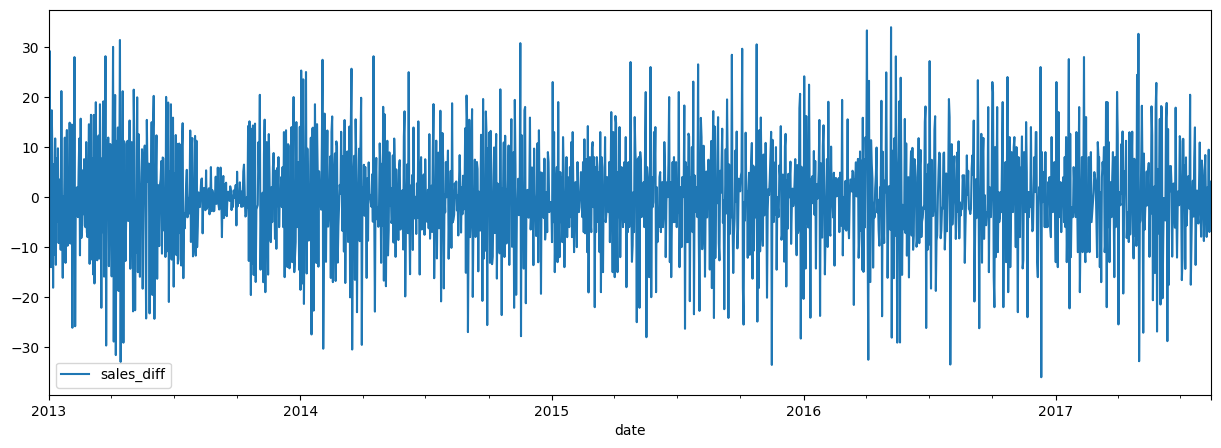

In [26]:
differenced_df = train_filled_df.groupby(['date'])['sales_diff'].sum().reset_index()

# Set 'date' column as the index
differenced_df.set_index('date', inplace=True)
differenced_df.plot(figsize=(15,5))
plt.show()

In [27]:
sales_df = train_filled_df.groupby(train_filled_df.index)['sales'].sum().reset_index()

In [28]:
sales_df['moving_average'] = sales_df['sales'].rolling(window = 30).mean()

In [29]:
train_filled_df['sales_diff']

date
2013-01-01       NaN
2013-01-01     0.000
2013-01-01     0.000
2013-01-01     0.000
2013-01-01     0.000
               ...  
2017-08-15    -2.000
2017-08-15    44.575
2017-08-15    -1.068
2017-08-15   -23.177
2017-08-15    -7.330
Name: sales_diff, Length: 3008016, dtype: float64

In [30]:
train_filled_df.isna().sum()

family            0
store_nbr         0
id             7128
sales             0
onpromotion       0
Year           7128
Month          7128
Day            7128
Month_name     7128
Day_name       7128
sales_log         0
sales_diff        1
dtype: int64

In [31]:
differenced_df 

,sales_diff
date,
2013-01-01,0.000000
2013-01-02,29.214000
2013-01-03,-4.214000
2013-01-04,-14.000000
2013-01-05,17.361000
...,...
2017-08-11,9.481000
2017-08-12,-6.971999
2017-08-13,3.140999


In [28]:
diff_df = train_filled_df.groupby(train_filled_df.index)['sales_diff'].sum().reset_index()

In [29]:
diff_df

,date,sales_diff
0,2013-01-01,0.000000
1,2013-01-02,29.214000
2,2013-01-03,-4.214000
3,2013-01-04,-14.000000
4,2013-01-05,17.361000
...,...,...
1683,2017-08-11,9.481000
1684,2017-08-12,-6.971999
1685,2017-08-13,3.140999
1686,2017-08-14,-3.000000


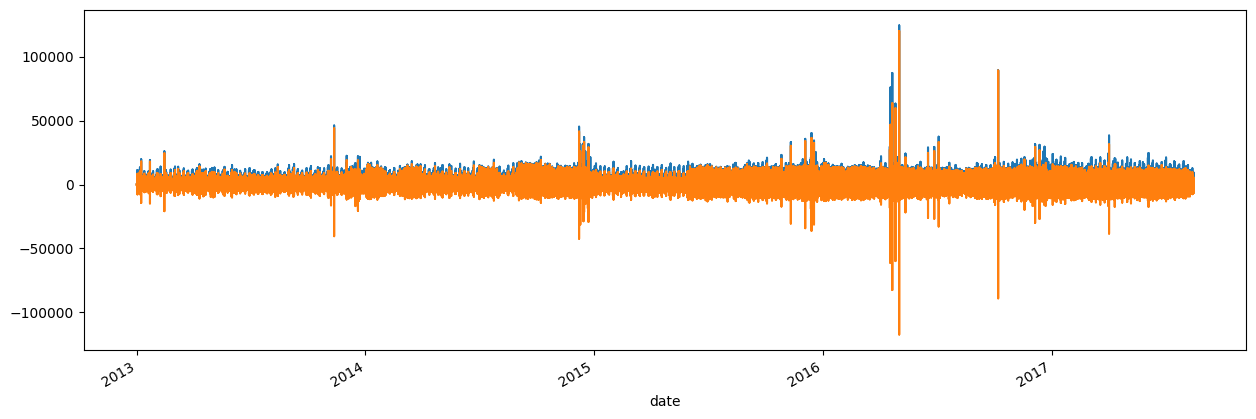

In [32]:
differenced_df = train_filled_df.groupby(['date'])['sales_diff'].sum().reset_index()

# Set 'date' column as the index
differenced_df.set_index('date', inplace=True)
train_filled_df['sales'].plot(figsize=(15,5))
train_filled_df['sales_diff'].plot(figsize=(15,5))
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'train_filled_df' is your DataFrame and 'sales' is the column you want to test

result = adfuller(differenced_df['sales_diff'])

# Extracting and printing the results
#print('ADF Statistic:', result[0])
#print('p-value:', result[1])

if result[1] < 0.05:
    print('data is stationary')

else:
    print('data is not stationary')


data is stationary


<Axes: xlabel='date'>

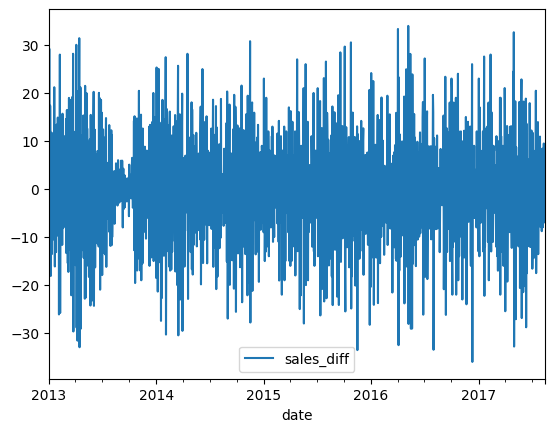

In [20]:
differenced_df.plot()

<Axes: >

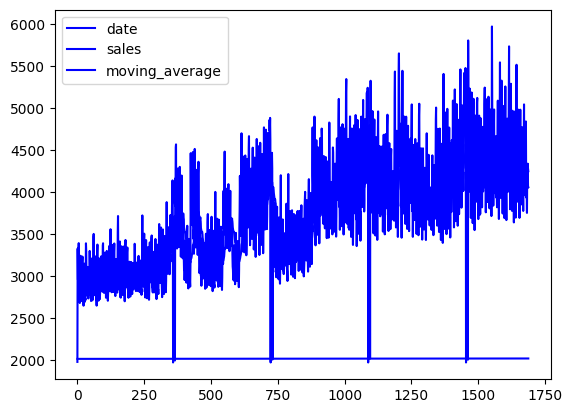

In [34]:
sales_df.plot(label='Original', color='blue')

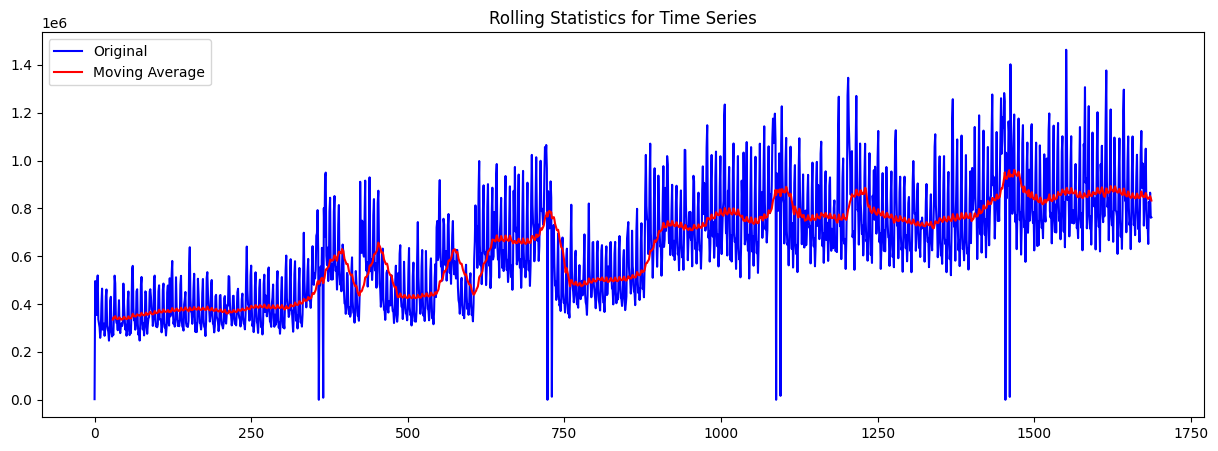

In [25]:
plt.figure(figsize=(15,5))
plt.plot(sales_df['sales'], label='Original', color='blue')
plt.plot(sales_df['moving_average'], label='Moving Average', color='red')
plt.title('Rolling Statistics for Time Series')
plt.legend()
plt.show()

In [35]:
# Assuming 'differenced_df' is your DataFrame and 'date' is one of the columns

# Filter rows with dates greater than or equal to '2015-08-15'
test_data = differenced_df[differenced_df.index >= '2016-08-15']

# Filter rows with dates less than '2015-08-15'
train_data = differenced_df[differenced_df.index < '2016-08-15']

# Print the number of rows in each filtered DataFrame
print("Number of rows with dates greater than or equal to '2016-08-15':", test_data)
print("Number of rows with dates less than '2016-08-15':", train_data)


Number of rows with dates greater than or equal to '2016-08-15':             sales_diff
date                  
2016-08-15   -1.044001
2016-08-16   -3.683000
2016-08-17   -2.066000
2016-08-18   -2.362000
2016-08-19    4.370999
...                ...
2017-08-11    9.481000
2017-08-12   -6.971999
2017-08-13    3.140999
2017-08-14   -3.000000
2017-08-15   -1.000000

[366 rows x 1 columns]
Number of rows with dates less than '2016-08-15':             sales_diff
date                  
2013-01-01    0.000000
2013-01-02   29.214000
2013-01-03   -4.214000
2013-01-04  -14.000000
2013-01-05   17.361000
...                ...
2016-08-10   -3.701000
2016-08-11    8.911000
2016-08-12   -2.904000
2016-08-13   11.149001
2016-08-14   -8.250000

[1322 rows x 1 columns]


In [33]:
train_data

,sales_diff
date,
2013-01-01,0.000000
2013-01-02,29.214000
2013-01-03,-4.214000
2013-01-04,-14.000000
2013-01-05,17.361000
...,...
2016-08-10,-3.701000
2016-08-11,8.911000
2016-08-12,-2.904000


In [47]:
from pmdarima import auto_arima

# Assuming you already imported 'train_data' DataFrame

sarima_model = auto_arima(
    train_data['sales_diff'], seasonal=True, m=7, stepwise=True)

print(sarima_model.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1322
Model:             SARIMAX(4, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -4469.499
Date:                           Mon, 13 May 2024   AIC                           8956.999
Time:                                   17:24:25   BIC                           9003.681
Sample:                               01-01-2013   HQIC                          8974.500
                                    - 08-14-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7.933e-07      0.000     -0.002      0.999      -0.001       0.001
ar.L1          0.1841      0.027      6.806

In [49]:
print('Sarima Model', sarima_model.order)
print('Seasonal Order', sarima_model.seasonal_order)

Sarima Model (4, 0, 1)
Seasonal Order (1, 0, 1, 7)


In [50]:
sarima_model.fit(train_data['sales_diff'])

ARIMA(order=(4, 0, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [51]:
n_test_period = len(test_data)

In [52]:
forecast= sarima_model.predict(n_periods=n_test_period)

In [53]:
forecast

2016-08-15   -4.221597
2016-08-16   -0.908396
2016-08-17   -2.929984
2016-08-18    0.061417
2016-08-19    0.550192
                ...   
2017-08-11    0.025473
2017-08-12    7.445379
2017-08-13    2.170152
2017-08-14   -7.554456
2017-08-15   -0.800695
Freq: D, Length: 366, dtype: float64

In [54]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

mae = mean_absolute_error (test_data['sales_diff'], forecast)
rmse = np.sqrt(mean_squared_error(test_data['sales_diff'],forecast))


Machine learning Models - XGBOOST 

In [36]:
train_filled_df

,family,store_nbr,id,sales,onpromotion,Year,Month,Day,Month_name,Day_name,sales_log,sales_diff
date,,,,,,,,,,,,
2013-01-01,AUTOMOTIVE,1,0.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,-inf,NaN
2013-01-01,AUTOMOTIVE,10,33.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,-inf,0.000
2013-01-01,AUTOMOTIVE,11,66.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,-inf,0.000
2013-01-01,AUTOMOTIVE,12,99.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,-inf,0.000
2013-01-01,AUTOMOTIVE,13,132.0,0.000,0.0,2013.0,1.0,1.0,January,Tuesday,-inf,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,SEAFOOD,54,3000755.0,3.000,0.0,2017.0,8.0,15.0,August,Tuesday,1.098612,-2.000
2017-08-15,SEAFOOD,6,3000788.0,47.575,0.0,2017.0,8.0,15.0,August,Tuesday,3.862307,44.575
2017-08-15,SEAFOOD,7,3000821.0,46.507,0.0,2017.0,8.0,15.0,August,Tuesday,3.839603,-1.068


In [37]:
train_data_ = train_filled_df.iloc[:int(len(train_filled_df)*0.8)]
test_data_ = train_filled_df.iloc[int(len(train_filled_df)*0.8):]

In [38]:
# Features (X) and target variable (y)
X_train = train_data_.drop(columns=['Month_name','Day_name','sales'])  # Features (train_data)
y_train = train_data_['sales']  # Target variable (train_data)
X_test = test_data_.drop(columns=['Month_name','Day_name','sales'])  # Features (test_data)
y_test = test_data_['sales']  # Target variable (test_data)

In [39]:
numerical = train_filled_df.select_dtypes(include='number')
numerical= numerical.drop(columns=['sales_log','store_nbr','sales'])
numerical_columns = numerical.columns.tolist()


In [40]:
numerical

,id,onpromotion,Year,Month,Day,sales_diff
date,,,,,,
2013-01-01,0.0,0.0,2013.0,1.0,1.0,NaN
2013-01-01,33.0,0.0,2013.0,1.0,1.0,0.000
2013-01-01,66.0,0.0,2013.0,1.0,1.0,0.000
2013-01-01,99.0,0.0,2013.0,1.0,1.0,0.000
2013-01-01,132.0,0.0,2013.0,1.0,1.0,0.000
...,...,...,...,...,...,...
2017-08-15,3000755.0,0.0,2017.0,8.0,15.0,-2.000
2017-08-15,3000788.0,0.0,2017.0,8.0,15.0,44.575
2017-08-15,3000821.0,0.0,2017.0,8.0,15.0,-1.068


In [41]:
categorical = train_filled_df.select_dtypes(include='object')
categorical= categorical.drop(columns=['Month_name','Day_name'])

categorical_columns = categorical.columns.tolist()


In [42]:
categorical

,family
date,
2013-01-01,AUTOMOTIVE
2013-01-01,AUTOMOTIVE
2013-01-01,AUTOMOTIVE
2013-01-01,AUTOMOTIVE
2013-01-01,AUTOMOTIVE
...,...
2017-08-15,SEAFOOD
2017-08-15,SEAFOOD
2017-08-15,SEAFOOD


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Import mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate mean squared error


In [50]:

# Preprocessing pipelines
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder())
])
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_columns),
    ('numerical', numerical_pipeline, numerical_columns)
])

# Full pipeline including preprocessing and model training
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline to the training data
full_pipeline.fit(X_train, y_train)

# Make predictions on the testing data
predictions = full_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse_scores = np.sqrt(mse)
print("Mean RMSE:", rmse_scores.mean())
print("Mean Squared Error:", mse)

Mean RMSE: 788.0618336176364
Mean Squared Error: 621041.4536047911


In [56]:
models={}

models['XGBoost'] = XGBRegressor()
#models['RandomForest'] = RandomForestRegressor()
models['GradientBoostRegressor'] = GradientBoostingRegressor()
#models['log_reg_model'] = LogisticRegression()
models['Linear_reg'] = LinearRegression() 

In [59]:
# Creating Pipeline

all_pipelines = {}

# creating a dataframe 
metric_table=pd.DataFrame(columns=['model_name', 'MSE', 'MAE', 'RMSE', 'R_squared', 'RMSLE'])


for model_name, regressor in models.items():
    forecast_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', TransformedTargetRegressor(regressor = regressor))
    ])

    forecast_pipeline.fit(X_train, y_train)

    all_pipelines[model_name] = forecast_pipeline

    forecast = forecast_pipeline.predict(X_test)

    MSE = mean_squared_error(y_test, forecast)
    MAE = mean_absolute_error(y_test, forecast)
    RMSE =np.sqrt(mean_squared_error(y_test, forecast))
    R_squared = r2_score(y_test, forecast)

    y_test_abs = abs(y_test)
    forecast_abs = abs(forecast)

    RMSLE = np.sqrt(mean_squared_log_error(y_test_abs, forecast_abs))

    metric_table.loc[len(metric_table)]=[model_name, MSE, MAE, RMSE, R_squared, RMSLE]
# Sort values in ascending order
metric_table.sort_values(by='MSE', ascending=True)


,model_name,MSE,MAE,RMSE,R_squared,RMSLE
0,GradientBoostRegressor,406764.805122,202.454668,637.781158,0.779869,1.396275
1,Linear_reg,621041.453605,320.699596,788.061834,0.663907,2.806997


In [66]:
param_grids = {
   
    
     'GradientBoostRegressor': {
         'regressor__regressor__n_estimators': [100, 200, 300],
         'regressor__regressor__learning_rate': [0.01, 0.1, 0.2],
         'regressor__regressor__max_depth': [3, 4, 5]
     },
    'XGBoost': {
        'regressor__regressor__n_estimators': [100, 200, 300],
        'regressor__regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__regressor__max_depth': [3, 4, 5]
   }
 }

In [67]:
for model_name, regressor in models.items():
    forecast_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', TransformedTargetRegressor(regressor=regressor))
    ])

    random_search = RandomizedSearchCV(
        forecast_pipeline,
        param_grids[model_name],
        cv=5,
        scoring='neg_mean_squared_error',
        n_iter=10,  # Number of parameter settings that are sampled
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train, y_train)

    best_pipeline = random_search.best_estimator_
    all_pipelines[model_name] = best_pipeline

    forecast = best_pipeline.predict(X_test)

    MSE = mean_squared_error(y_test, forecast)
    MAE = mean_absolute_error(y_test, forecast)
    RMSE = np.sqrt(mean_squared_error(y_test, forecast))
    R_squared = r2_score(y_test, forecast)

    y_test_abs = abs(y_test)
    forecast_abs = abs(forecast)

    RMSLE = np.sqrt(mean_squared_log_error(y_test_abs, forecast_abs))

    metric_table.loc[len(metric_table)] = [model_name, MSE, MAE, RMSE, R_squared, RMSLE]


KeyboardInterrupt: 

In [52]:
metric_table.sort_values(by='MSE', ascending=True)

,model_name,MSE,MAE,RMSE,R_squared,RMSLE
0,XGBoost,492805.399606,211.761641,702.000997,0.733306,1.41051


In [ ]:

   
   
    # Actual vs. Predicted Values Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, forecast, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values for {model_name}')
    plt.show()

    # Residuals Plot
    residuals = y_test - forecast

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Residuals Distribution for {model_name}')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(forecast, residuals, alpha=0.3)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. Predicted Values for {model_name}')
    plt.show()
